In [5]:
import numpy as np

##======================================================================================================##

## Given a list of birth and death time, draw the persistence barcode.
def persistence_barcode(births, deaths, ideallist):
    """
    Draws a persistence barcode from the given birth and death times.
    
    Parameters:
    births (list): List of birth times.
    deaths (list): List of death times.
    
    Returns:
    None
    """
    import matplotlib.pyplot as plt
    
    # Ensure births and deaths are numpy arrays for easier manipulation
    births = np.array(births)
    deaths = np.array(deaths)
    # Check if births and deaths have the same length
    if len(births) != len(deaths):                                              
        raise ValueError("Births and deaths must have the same length.")
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5))
    actual_time =np.array(deaths)
    actual_time[np.isinf(actual_time)] = 0  # Replace inf with 0 for plotting
    max_time = max(np.max(births), np.max(actual_time))  # Find the maximum time for x-axis limits
    # Plot each interval as a horizontal line
    
    #ax.set_xlim(0, max_time *1.1)  # Set x-axis limits
    for i in range(len(births)):    
        if deaths[i] == float('inf'):
            ax.plot ([births[i], max_time*1.1], [i, i], label=ideallist[i])
        else:
            ax.plot([births[i], deaths[i]],[i,i], marker="|", markersize=10, label=ideallist[i])
    
    # Set labels and title
    ax.set_xlabel('Radius')
    ax.set_ylabel('ideal')
    ax.set_title('Persistence Barcode of persistent ideals')
    
    # Show grid and legend
    ax.grid(True)
    #ax.legend(loc=3, bbox_to_anchor=(1.15, 0), borderaxespad=0)
    
    # Show the plot
    plt.show()


## Given a list of indices (e.g., [0, 3, 4, 7]), generate the corresponding ideal x_0,x_3,x_4,x_7))
def generate_parameter_name_list(input_indices):
    """
    Generates a list of parameter names based on input indices.
    
    Parameters:
    input_indices (list): List of indices to generate parameter names for.
    
     input_variable_name (list): List of variable names corresponding to each index.
    
    Returns:
     parameter_name_list (string): A list of parameter names in the format ['(x_0,x_3, y_4,, y_7)'].
    """
    input_indices=list(input_indices)  # Ensure input is a list
    if not input_indices:
        return ['(0)']  # Return empty parentheses if no indices are provided
    number_of_parameters = len(input_indices)
    parameter_name_list = ['(']
    for i in range(number_of_parameters):
       parameter_name_list.append(f'x_{input_indices[i]}')
       parameter_name_list.append(f',')
    parameter_name_list[-1] = ')'  # Replace the last comma with a closing parenthesis
  ## Return the result...
    return parameter_name_list



#test
#A=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#B=np.array(['x','x','z','y','y','y','x','y','y','x'])
#print(generate_parameter_name_list(A))
#idealname = ''.join(generate_parameter_name_list(A))
#print(idealname)  # Output: (x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10)


# Create an ideallist from a list of index of the cliques
#def create_ideallist(cliques):
 #   """
  #  Creates a list of identifiers for each clique.
    
   # Parameters:
   # cliques (list): List of cliques where each clique is a set of vertices.
    
    #Returns:
    #idealist (list): an ideallist of associative primes from the index of the cliques
   # """
   # idealist=[]
   # num_clique= len(cliques)
   # for i in range(num_clique):
    #   parameter_name_list= generate_parameter_name_list(cliques[i])
     #  idealname = ''.join(parameter_name_list)
      # idealist.append(idealname)
    #return(idealist)



#if __name__ == "__main__":
 #   # Example usage
  #  births = [0, 1, 2, 3]
   # deaths = [2, 3, 5, 4]
    #ideallist = ['a', 'b', 'c', 'd']    
    #persistence_barcode(births, deaths, ideallist)     

## Algorithm to find all maximal cliques in an undirected graph.
## This implementation uses a backtracking approach to find all maximal cliques.
def all_maximal_cliques(G):
    """
    Finds all maximal cliques in an undirected graph G.
    
    Args:
        G: A graph represented as an adjacency dictionary where 
           G[v] is the set of neighbors of vertex v.
    
    Returns:
        A list of all maximal cliques (each clique is a set of vertices)
    """
    # Initialize sets
    C = set()  # Current clique being built
    P = set(G.keys())  # Potential candidates to add to clique
    S = set()  # Already processed vertices
    
    # Start the algorithm
    cliques = []
    next_maximal_clique(G, C, P, S, cliques)
    return cliques

def next_maximal_clique(G, C, P, S, cliques):
    """
    Recursive helper function to find maximal cliques.
    """
    if not P and not S:
        # Found a maximal clique
        cliques.append(list(C))
        return
    
    # Choose a pivot vertex to minimize recursion branches
    pivot = select_pivot(G, P, S)
    
    # Iterate through candidates not neighbors of pivot
    for v in P - set(G[pivot]):
        # Add v to current clique
        C.add(v)
        
        # Recursively find cliques containing C ∪ {v}
        new_P = P & set(G[v])
        new_S = S & set(G[v])
        next_maximal_clique(G, C, new_P, new_S, cliques)
        
        # Backtrack
        C.remove(v)
        P.remove(v)
        S.add(v)

def select_pivot(G, P, S):
    """
    Selects a pivot vertex from P ∪ S to maximize |P ∩ neighbors(pivot)|.
    This helps minimize recursive calls.
    """
    pivot = None
    max_neighbors = -1
    for v in P.union(S):
        neighbors = P & set(G[v])
        if len(neighbors) > max_neighbors:
            max_neighbors = len(neighbors)
            pivot = v
    return pivot




###Construct an undirected graph as an adjacency list from an adjacency matrix.
#def adjacency_matrix_to_graph(adj_matrix):  
  #  """
 #   Converts an adjacency matrix to an undirected graph represented as an adjacency list.
    
   # Parameters:
   # adj_matrix (numpy.ndarray): The adjacency matrix of the graph.
    
   # Returns:
   # dict: A dictionary representing the graph where keys are vertices and values are sets of neighbors.
   # """
   # n = adj_matrix.shape[0]
   # graph = {i: set() for i in range(1,n+1)}
    
   # for i in range(n):
    #    for j in range(i + 1, n):  # Only check upper triangle for undirected graph
     #       if adj_matrix[i, j] == 1:
      #          graph[i+1].add(j+1)
       #         graph[j+1].add(i+1)
    
   # return graph



## Given a  Gram matrix, output a array consisting of ordered entries of the Gram matrix and the corresponding indices.
### Here we reuire the diagonal Gram matrix to be zero
def gram_matrix_to_ordered_array(gram_matrix):
    """
    Converts a Gram matrix to an array of ordered entries and their corresponding indices.
    
    Parameters:
    gram_matrix (numpy.ndarray): The Gram matrix.
    
    Returns:
    tuple: A tuple containing the ordered entries 
    """
    n = gram_matrix.shape[0]
    entries = []
    
    for i in range(n):
        for j in range(i , n):  # Only consider upper triangle for unique pairs
            entries.append(gram_matrix[i, j])
    entries=set(entries)  # Remove duplicates
    entries = list(entries)  # Convert to list for sorting
    ordered_entries = sorted(entries)
    return np.array(ordered_entries)


## Construct Viectoris-Rips Complex from a Gram matrix.
def gram_matrix_to_viectoris_rips(gram_matrix, threshold):
    """
    Constructs a Viectoris-Rips complex from a Gram matrix.
    
    Parameters:
    gram_matrix (numpy.ndarray): The Gram matrix.
    threshold (float): The threshold distance for the Vietoris-Rips complex.
    
    Returns:
    dict: A dictionary representing the Vietoris-Rips complex as an adjacency list.
    """
    n = gram_matrix.shape[0]
    graph = {i: set() for i in range(n)}
    
    for i in range(n):
        for j in range(i + 1, n):
            if gram_matrix[i, j] <= threshold:
                graph[i].add(j)
                graph[j].add(i)
    
    return graph
    
## Construct persistent Viectoris-Rips Complex from a Gram matrix and return an arrray of graphs
def gram_matrix_to_persistent_viectoris_rips(gram_matrix, thresholds):
    """
    Constructs a persistent Viectoris-Rips complex from a Gram matrix for multiple thresholds.
    
    Parameters:
    gram_matrix (numpy.ndarray): The Gram matrix.
    thresholds (list): A list of threshold distances for the Vietoris-Rips complex.
    
    Returns:
    list: A list of dictionaries representing the Vietoris-Rips complexes for each threshold.
    """
    persistent_complexes = []
    
    for threshold in thresholds:
        complex_graph = gram_matrix_to_viectoris_rips(gram_matrix, threshold)
        persistent_complexes.append(complex_graph)
    
    return persistent_complexes 

## From a list of cliques, calculate the corresonding associated primes.
#Note that this algorithm only applies to the clique complex of a graph.
def calculate_associative_primes(Cliques, datapoints):
    """
    Calculates the associative primes from a list of cliques.
    
    Parameters:
    cliques (array): A list of cliques where each clique is a set of vertices.
    datapoints (set): A set of data points corresponding to the vertices in the cliques.
    Returns:
    list: A list of associative primes corresponding to the cliques.
    """
    idealist = []
    for clique in Cliques:
        cliqueset= set(clique)
        idealindex=datapoints .difference(cliqueset)
        listofidealindex =np.array(list(idealindex))
        listofidealindex+=1  # Adjust indices to start from 1
        idealname = ''.join(generate_parameter_name_list(listofidealindex))
        idealist.append(idealname)
    return idealist


## Calculate the birth and death times of the persistent ideals from the Vietoris-Rips complex.
def calculate_birth_death_times(persistent_complexes, timeseries, data_points): 
    """
    Calculates the birth and death times of persistent homology from a Vietoris-Rips complex.
    
    Parameters:
    persistent_complexes (dict): The Vietoris-Rips complex as an adjacency list.
    timeseries (array): the array of threshold values corresponding to the persistent complexes, also referred as radius series.
    data_points (array):  the list of data points .
    Returns:
    tuple: A tuple containing two lists - birth times and death times and a list of associative primes.
    """

    
    AllCliques=[]
    ideallist = set()
    idealcontainer = set()  # To store ideals in each time 
    dead_ideal_list = {t:list() for t in timeseries}
    born_ideal_list = {t:list() for t in timeseries}
   
    final_time= float('inf')  # Set a final time for ideals that are still alive at the end of the last time
    for persistent_complex in persistent_complexes:
         Cliques = all_maximal_cliques(persistent_complex)
         AllCliques.append(Cliques)   
    

    datapoints =set(data_points)
    for t in range(len(timeseries)):
        Cliques = AllCliques[t]
        ideallist_at_time_t= calculate_associative_primes(Cliques, datapoints)
        ideallist=ideallist.union(ideallist_at_time_t)
        new_born_ideals = set(ideallist_at_time_t) - idealcontainer
        non_dead_ideals = set(ideallist_at_time_t) - new_born_ideals
        new_death_ideals= set(idealcontainer) - non_dead_ideals
        dead_ideal_list[timeseries[t]].extend(list(new_death_ideals))
        born_ideal_list[timeseries[t]].extend(list(new_born_ideals))  
        idealcontainer= idealcontainer.union(new_born_ideals)
        idealcontainer= idealcontainer.difference(new_death_ideals)
       
    final_ideals=list(idealcontainer)


    ideallist=list(ideallist)
    num_of_ideals = len(ideallist)
    birthtime= np.zeros(num_of_ideals)
    deathtime= np.zeros(num_of_ideals)
    for t in range(len(timeseries)):
        for ideal in born_ideal_list[timeseries[t]]:
            if ideal in ideallist:
                index = ideallist.index(ideal)
                birthtime[index] = timeseries[t]
        for ideal in dead_ideal_list[timeseries[t]]:
            if ideal in ideallist:
                index = ideallist.index(ideal)
                deathtime[index] = timeseries[t]
    # Set death time for ideals that are still alive at the end of the last time
    for ideals in final_ideals:
        if ideals in ideallist:
            index = ideallist.index(ideals)
            deathtime[index] = final_time
    # sort the list accrording to the birth time
    sorted_indices = np.argsort(birthtime)
    birthtime = birthtime[sorted_indices]
    deathtime = deathtime[sorted_indices]  
    ideallist = [ideallist[i] for i in sorted_indices]
    return birthtime, deathtime, ideallist

    ## Gicen a list of datapoints in Euclidean space, calculte its gram matrix.
def calculate_gram_matrix(datapoints):
    """
    datapoints(list): A list of data points in Euclidean space.
    Returns:    
    gram_matrix (numpy.ndarray): The Gram matrix of the data points.
    """
    datapoints = np.array(datapoints)
    n = datapoints.shape[0]
    grammatrix= np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            grammatrix[i, j] = np.sqrt(np.dot(datapoints[i]-datapoints[j], datapoints[i]-datapoints[j]))
            grammatrix[j, i] = grammatrix[i, j]
    return grammatrix

      #  for clique in Cliques:
       #     cliqueset= set(clique)
        #    idealindex=datapoints .difference(cliqueset)
         #   idealname = ''.join(generate_parameter_name_list(idealindex))
          #  if idealname not in idealcontainer:
           #     idealcontainer.add(idealname)
                
    
   # return birth_times, death_times, ideallist


# Example usage:
#A=np.array([[0,2,3,4],[2,0,3,5],[3,3,0,1],[4,5,1,0]])
#ordered_entries, ordered_indices, indices = gram_matrix_to_ordered_array(A)
#print("Ordered Entries:", ordered_entries)
#print("Ordered Indices:", ordered_indices)
#print("Indices:", indices)





 #Example adjacency matrix
#adj_matrix = np.array([[0, 1, 1, 0],
 #                       [1, 0, 1, 1],
  #                      [1, 1, 0, 0],
   #                     [0, 1, 0, 0]])
#graph = adjacency_matrix_to_graph(adj_matrix)



 #Example graph (undirected)
#G = {
#    1: {2, 3,4,5,7},
 #   2: {1, 3,4,5},
  #  3: {1, 2, 4,5},
   # 4: {1,2,3,5,9,10},
 #   5: {1,2,3,4,6,7},
  #  6: {1,5,7},
   # 7: {1,5,6,8},
 #   8: {6,7},
  #  9: {4,10},
   # 10: {4,9}
#}

#cliques = all_maximal_cliques(G)
#print("Maximal Cliques:", cliques)
#deallist=calculate_associative_primes (cliques,{1,2,3,4,5,6,7,8,9,10})
#print(ideallist)




In [ ]:
#### Example of structure of different structures of Ribose
##  

In [2]:
###### Example of the data of C-60
data=[[2.16650, 0.59060,  2.58740],     
      [3.03780, 0.17660,  1.59180],     
      [1.27860, -0.30980, 3.16790],     
      [3.01180,  -1.14340,   1.16540],     
      [3.10340,  -1.43350,  -0.19300],     
      [3.15030,   1.21060,   0.66820],     
      [3.24280,   0.91490,  -0.68590],     
      [3.21920,  -0.40230,  -1.12070],     
      [-0.43930,  1.35270,   3.12710],     
      [0.43630,   2.26180,   2.55420],   
      [-0.02960,  0.06330,   3.43790],   
      [1.74420,   1.87900,   2.28300],    
      [2.35190,   2.26760,   1.09900],    
      [-0.26330,  3.02680,   1.63260],    
      [0.33740,   3.40540,   0.43730],    
      [1.65160,   3.02780,   0.17070],    
      [-2.09030,  -0.82250,   2.59550],    
      [-2.51110,   0.46640,   2.28540],    
      [-0.84490,  -1.02520,   3.17380],    
      [-1.68740,   1.55330,   2.55120],    
      [-1.58430,   2.58580,   1.63190],    
      [-3.23140,   0.40610,   1.10070],    
      [-3.12270,   1.44100,   0.17460],    
      [-2.29470,   2.52910,   0.43990],    
      [-0.49080,  -2.91330,   1.73650],    
      [-1.74300,  -2.71240,   1.16370],    
      [-0.03930,  -2.06840,   2.74530],    
      [-2.54860,  -1.66500,   1.59420],    
      [-3.26020,  -0.91410,   0.67010],    
      [-1.65430,  -3.00610,  -0.18970],    
      [-2.35420,  -2.24390,  -1.11700],   
      [-3.16430,  -1.19490,  -0.68780],    
      [2.13640,  -2.05530,   1.73580],    
      [1.68950,  -2.90090,   0.72930],   
      [1.27850,  -1.63660,   2.74350],    
      [0.36780,  -3.33270,   0.73020],    
      [-0.34400,  -3.39040,  -0.45940],   
      [2.28890,  -2.52500,  -0.46400],    
      [1.57900,  -2.57180,  -1.65800],    
      [0.25600,  -3.00540,  -1.65310],   
      [-2.18280,  -0.57830,  -2.59790],   
      [-1.74800,  -1.86940,  -2.30830],  
      [-0.43850,  -2.24690,  -2.58450],    
      [-1.28150,   0.31890,  -3.16710],   
      [-2.15260,   2.05450,  -1.73780],   
      [-3.04850,   1.15350,  -1.18110],   
      [-3.06560,  -0.16290,  -1.61070],    
      [-1.26610,  1.64070,  -2.72710],    
      [0.50390,   2.93610,  -1.74180],   
      [-0.37880,  3.35610,  -0.75130],   
      [-1.69430,  2.91860,  -0.74910],   
      [0.05210,   2.07300,  -2.73550],    
      [2.09760,   0.83400,  -2.60510],    
      [2.55170,   1.69230,  -1.61070],    
      [1.75890,   2.74520,  -1.18240],    
      [0.84200,   1.02060,  -3.17860],    
      [0.44610,  -1.34950,  -3.16610],    
      [1.69830,  -1.54850,  -2.59080],    
      [2.51840,  -0.46230,  -2.31710],    
      [0.02180,  -0.06450,  -3.45850]]   


grammatrix = calculate_gram_matrix(data)
print(grammatrix)

#datapoint_size=grammatrix.shape[0]
#datapoints = set(range(datapoint_size))  # Assuming data points are indexed by {1,\dots,n}
#print(datapoints)
#timeseries=gram_matrix_to_ordered_array(grammatrix)
#print("Ordered Entries:", timeseries)
#persisetent_complexes = gram_matrix_to_persistent_viectoris_rips(grammatrix, timeseries)
#print("Persistent Complexes:", persisetent_complexes)
#birthtime, deathtime, ideallist = calculate_birth_death_times(persisetent_complexes, timeseries, datapoints)
#print("Birth Times:", birthtime)
#print("Death Times:", deathtime)
#print("Ideallist:", ideallist)
#persistence_barcode(birthtime, deathtime, ideallist)

[[0.         1.38628246 1.39142618 ... 5.62216287 5.02857358 6.44839522]
 [1.38628246 0.         2.41152666 ... 4.71851386 3.99468006 5.88726722]
 [1.39142618 2.41152666 0.         ... 5.90534939 5.6254409  6.74899217]
 ...
 [5.62216287 4.71851386 5.90534939 ... 0.         1.38827452 2.40121043]
 [5.02857358 3.99468006 5.6254409  ... 1.38827452 0.         2.77381513]
 [6.44839522 5.88726722 6.74899217 ... 2.40121043 2.77381513 0.        ]]


Birth Times: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03328965 0.17441185
 0.18095605 0.19349007 0.21586509 0.22819638 0.24573434 0.25710297
 0.26826168 0.27477489 0.27977677 0.28596265 0.29541556 0.29541556
 0.31301541 0.31533323 0.35147924 0.35620621 0.37132096 0.38472193
 0.38472193 0.38586316 0.39419716 0.39912015 0.41953479 0.43254802
 0.45389189 0.47110112 0.47587995 0.54262289 0.54390066 0.55973545
 0.57558946 0.57558946 0.58596937 0.58596937 0.58933528 0.60428899
 0.60689869 0.60689869 0.6287259  0.6287259  0.63845288 0.65942653
 0.66271629 0.67506583 0.80857615 0.82735908 0.84028887 0.9430299
 1.09150243]
Death Times: [0.17441185 0.03328965 0.26826168 0.28596265 0.03328965 0.47587995
 0.19349007 0.18095605 0.21586509 0.17441185 0.25710297 0.24573434
 0.24573434 0.31533323 0.29541556 0.25710297 0.35147924 0.29541556
 0.37132096 0.27977677 0.29541556 0.38472193 0.39912015 0.35147924
 0.38472193 0.35620621 0.3941971

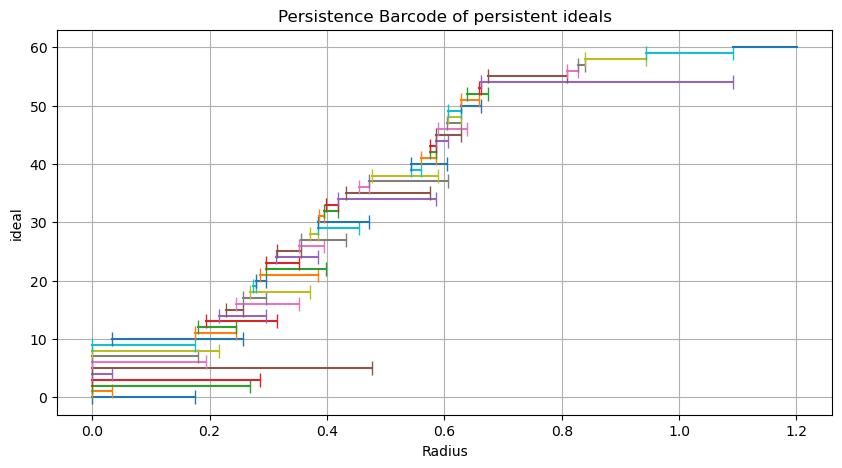

In [3]:
####Test examples for VR complexes
import numpy as np
from numpy.random import rand
datacloud= rand(10, 2)  # Generate a random set of 10 points in 2D, we can also put our target data cloud with their coordinates here
grammatrix = calculate_gram_matrix(datacloud)
datapoint_size=grammatrix.shape[0]
datapoints = set(range(datapoint_size))  # Assuming data points are indexed
#print(datapoints)
timeseries=gram_matrix_to_ordered_array(grammatrix)
#print("Ordered Entries:", timeseries)
persisetent_complexes = gram_matrix_to_persistent_viectoris_rips(grammatrix, timeseries)
#print("Persistent Complexes:", persisetent_complexes)
birthtime, deathtime, ideallist = calculate_birth_death_times(persisetent_complexes, timeseries, datapoints)
print("Birth Times:", birthtime)
print("Death Times:", deathtime)
print("Ideallist:", ideallist)
persistence_barcode(birthtime, deathtime, ideallist)